In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [63]:
df = pd.read_csv('sonar_dataset.csv', header=None)
df.shape

(208, 61)

In [64]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [65]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [66]:
X = df.drop(60, axis='columns')
y = df[60]

y = pd.get_dummies(y, drop_first=True)
y = np.asarray(y).astype(np.int8)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [68]:
X_train.shape

(156, 60)

In [69]:
import tensorflow as tf
from tensorflow import keras

In [70]:
model = keras.Sequential([
    keras.layers.Input(shape=(60,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5453 - loss: 0.6944
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5872 - loss: 0.6805 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6607 - loss: 0.6645 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7562 - loss: 0.6337 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7627 - loss: 0.5994 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7500 - loss: 0.5846
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8164 - loss: 0.5397
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8001 - loss: 0.5093
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8083 - loss: 0.5128
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7807 - loss: 0.4560
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8096 - loss: 0.4207
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - acc

In [71]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.7425  


[0.6567522287368774, 0.8461538553237915]

In [72]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[2.3871622e-04 4.0421225e-04 5.8385936e-06 2.2597353e-03 9.7683805e-01
 1.0347077e-02 5.8708480e-04 4.1788520e-04 9.9998575e-01 3.2233819e-04]
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        31
           1       0.93      0.67      0.78        21

    accuracy                           0.85        52
   macro avg       0.87      0.82      0.83        52
weighted avg       0.86      0.85      0.84        52



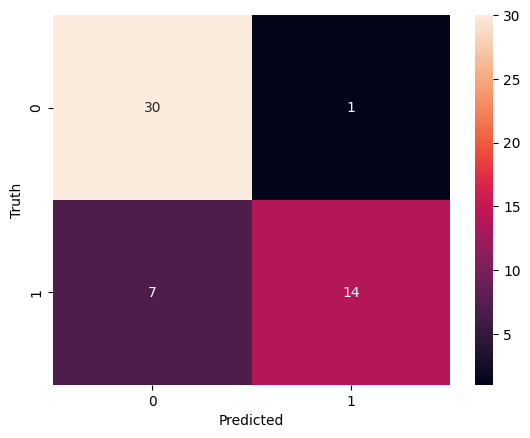

In [74]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [75]:
model = keras.Sequential([
    keras.layers.Input(shape=(60,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4607 - loss: 0.7351
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5220 - loss: 0.7007 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6215 - loss: 0.6560 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5589 - loss: 0.6690 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7168 - loss: 0.6445 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5983 - loss: 0.6887 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6607 - loss: 0.6243 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6894 - loss: 0.6050 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6251 - loss: 0.6166 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6086 - loss: 0.6296 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6905 - loss: 0.5766 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [76]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9046 - loss: 0.2919  


[0.2746058404445648, 0.9038461446762085]

In [79]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred = np.round(y_pred)
print(y_pred[:10])

print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0.08448546 0.00137145 0.00956652 0.0375315  0.94911057 0.11294971
 0.003643   0.00904827 0.9999176  0.00387765]
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.94      0.81      0.87        21

    accuracy                           0.90        52
   macro avg       0.91      0.89      0.90        52
weighted avg       0.91      0.90      0.90        52



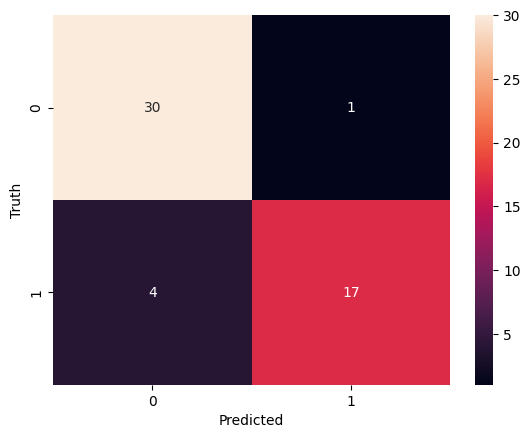

In [80]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()